In [1]:
import sys
sys.path.append('../')
from pyACC.clustering import *
import camb
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [2]:
omegab=0.05
omegac=0.25
h=0.7
As=2.1e-9
ns = 0.96

In [3]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=100*h,ombh2=omegab*h**2,omch2=omegac*h**2)
pars.InitPower.set_params(As=As,ns=ns)
pars.set_matter_power(redshifts=[10], kmax=10)

#Linear spectra
#pars.NonLinear = none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints =512)

In [4]:
pk_func = interp1d(kh,pk[0],kind='cubic',fill_value='extrapolate')

In [5]:
side = 500 #Mpc
Volume = side**3

n_cells=100 #100**3 cells in the cube
spacing =side/n_cells


In [6]:
delta_k,delta_x = generate_gaussian_map(pk_func,side,spacing)

(array([1.13333409e-04, 5.66667047e-05, 5.66667047e-05, 5.66667047e-05,
        1.70000114e-04, 1.70000114e-04, 7.93333865e-04, 1.02000068e-03,
        9.63333979e-04, 1.24666750e-03, 1.87000125e-03, 2.55000171e-03,
        3.68333580e-03, 5.89333728e-03, 6.97000467e-03, 9.35000627e-03,
        1.34300090e-02, 1.83033456e-02, 2.40266828e-02, 3.22433550e-02,
        4.14233611e-02, 5.57033707e-02, 6.77733788e-02, 8.36967228e-02,
        1.07440072e-01, 1.32713422e-01, 1.62916776e-01, 2.04736804e-01,
        2.44970164e-01, 2.98520200e-01, 3.58870241e-01, 4.15366945e-01,
        5.00197002e-01, 5.73240384e-01, 6.62887111e-01, 7.57690508e-01,
        8.66263914e-01, 9.76253988e-01, 1.07037738e+00, 1.19952080e+00,
        1.31931422e+00, 1.41411761e+00, 1.53561103e+00, 1.64220110e+00,
        1.73796783e+00, 1.83974123e+00, 1.90672128e+00, 1.97574132e+00,
        2.02521136e+00, 2.04481804e+00, 2.08550473e+00, 2.07853473e+00,
        2.04889804e+00, 2.05660471e+00, 1.98894467e+00, 1.912897

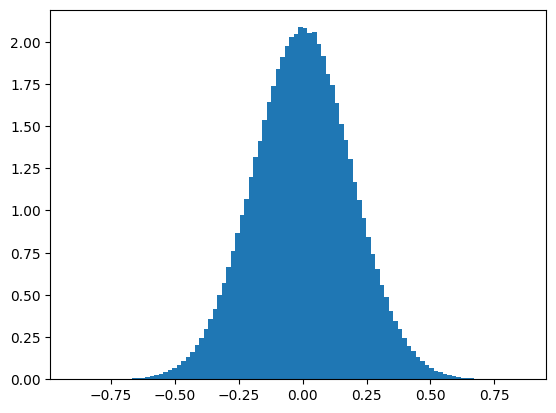

In [7]:
plt.hist(delta_x.flatten(),bins=100,density=True)

In [8]:
#get power spectrum
n_kF = 3 #numero freq fondamentali
k_bins, pk_meas = get_power_spectrum(delta_x,side,spacing, n_kF)

/home/elisalentini/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/elisalentini/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


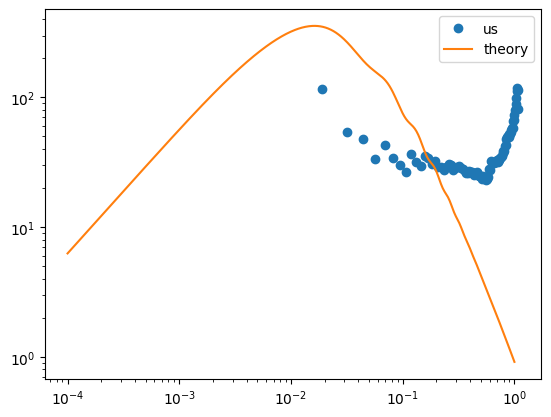

In [11]:
plt.loglog(k_bins, pk_meas, 'o', label = 'us')
plt.loglog(kh,pk[0],label='theory')
plt.legend()

In [12]:
#nella definizione di deltax ho una certa rho media

In [16]:
#generate points
n_mean = 1e-3 #1/volume
Volume = side**3
n_part = Volume*n_mean

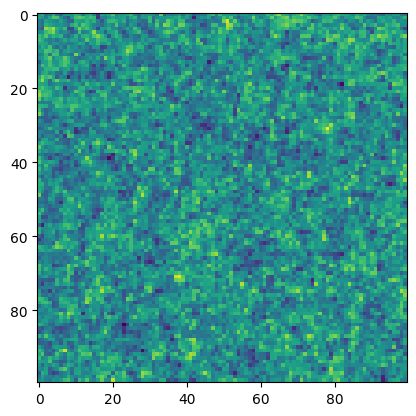

In [17]:
plt.imshow(delta_x[:,:,0])

In [18]:
n_x = n_mean *(1+delta_x)  #densità locale
n_obj_x = n_x*spacing**3  #campo densità continuo con densità reale

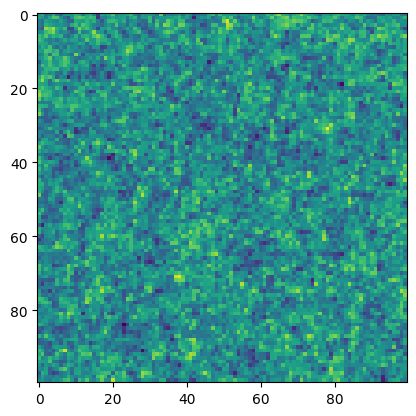

In [19]:
plt.imshow(n_obj_x[:,:,0])

In [20]:
#import a discrete sample 
#put the sample on a grid using NGP

In [23]:
npart = np.random.poisson(n_obj_x)
#mi dice se e quante particelle ho in ogni cella
#ho trasformato un campo continuo in uno discreto con densità intera

In [24]:
#np.sum(npart)

(array([8.82914e+05, 0.00000e+00, 1.09780e+05, 0.00000e+00, 0.00000e+00,
        6.98400e+03, 0.00000e+00, 3.10000e+02, 0.00000e+00, 1.20000e+01]),
 array([-1. ,  2.2,  5.4,  8.6, 11.8, 15. , 18.2, 21.4, 24.6, 27.8, 31. ]),
 <BarContainer object of 10 artists>)

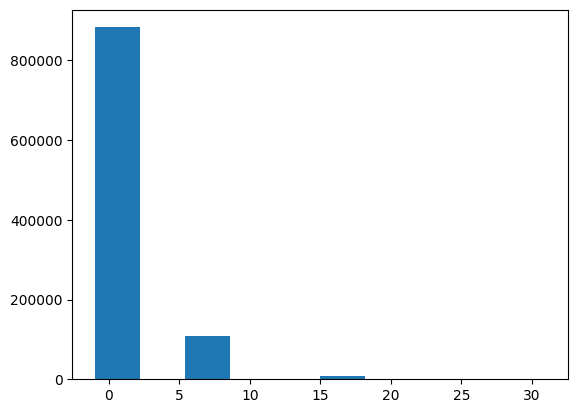

In [26]:
n_mean_tot = n_mean*spacing**3
delta_n_x = npart/np.sum(n_mean_tot)-1
plt.hist(delta_n_x.flatten())

In [29]:
k_bin,pk_nmeas = get_power_spectrum(delta_x,side,spacing, n_kF)

/home/elisalentini/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/elisalentini/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: x and y must have same first dimension, but have shapes (512,) and (1, 512)

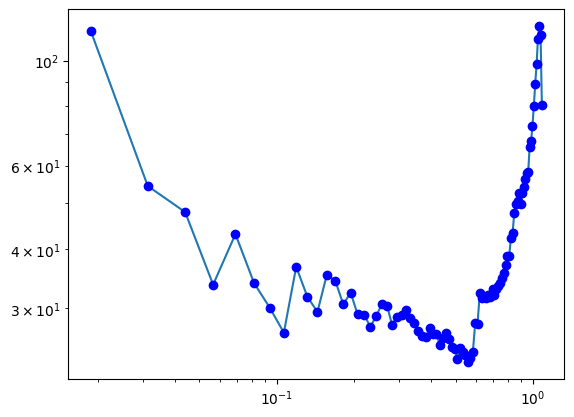

In [30]:
plt.loglog(k_bin,pk_nmeas,label = 'dicrete')
plt.loglog(k_bins, pk_meas, 'o', label = 'measured on the grid',color = 'b')
plt.loglog(kh,pk,label='theory')
plt.legend()

In [ ]:
#io misuro gli oggetti discreti
#guarda reg 20 mggio perchè forse manca un pezzo a fine prima ora

riguarda tutto perchè ci sono degli errori nel codice e manca la fine